# CDIPpy Example - SST Plot
The following example runs an application of the [CDIPpy](https://cdipsw.github.io/CDIPpy/quickstart/) python library to create a plot showing SST data (measured by Datawell Waverider thermistors at the sea surface, near the mooring eye of the buoy) over the entire month. Buoys return one SST value each half hour. 

1) read in CDIP station metadata,
2) access sst data for time period of interest,
3) plot timeseries,


## Import Libraries

Start by importing the necessary python packages and CDIPPY module

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import time
import calendar
import pandas as pd

# CDIP imports
import cdippy
from cdippy.stndata import StnData

## Initialize CDIPpy input parameters
* Supply CDIP station id
* Start date (YYYYMMDDHH)
* End date
* Station parameters

In [43]:
##- Initialize station id, start/end date, and parameters
stn = '100p1'
sdate = '20210201040201'
edate = '20220601040201'
sdate = '2022'
edate = '2023'
params = ['sstSeaSurfaceTemperature']

## Data Access

* Use cdippy.stndata function StnData(stn)
* Returns StnData object
* Access station metadata about individual stations deployments

### Grab data using 'get_series' function
Will return a dictionary of arrays for each parameter as keys

stn_data.get_series(start, end, params)
* start: start datetime (datetime obj)
* end: end datetime (datetime obj)
* params: list of parameters

In [44]:
##- Get Station Dataset object
stn_data = cdippy.stndata.StnData(stn)

##- Get metadata (i.e. information about individual deployments)
meta = stn_data.get_stn_meta()
stn_name = meta['metaStationName']
print(stn_name)

TORREY PINES OUTER, CA BUOY - 100p1


### List all available station variables/parameters
The get_stn_meta() object has all variables as dictionary keys

In [45]:
##- List meta keys
#[print(key) for key in meta.keys()]
meta.keys()

dict_keys(['metaStationName', 'metaDeployLatitude', 'metaDeployLongitude', 'metaWaterDepth', 'metaDeclination', 'geospatial_lat_min', 'geospatial_lat_max', 'geospatial_lat_units', 'geospatial_lat_resolution', 'geospatial_lon_min', 'geospatial_lon_max', 'geospatial_lon_units', 'geospatial_lon_resolution', 'geospatial_vertical_min', 'geospatial_vertical_max', 'geospatial_vertical_units', 'geospatial_vertical_resolution', 'time_coverage_start', 'time_coverage_end', 'date_created', 'date_modified'])

In [46]:
##- Use CDIPPY to convert input start/end date strings to datetime objects
start = cdippy.utils.cdip_datetime(sdate)
end = cdippy.utils.cdip_datetime(edate)

##- Grab data using 'get_series' function
data = stn_data.get_series(start, end,params)
data.keys()

dict_keys(['sstSeaSurfaceTemperature', 'sstTime'])

## Convert waveTimes to Datetime object

In [47]:
## Convert wave times to datetime objects (currently integers)
##- Convert times to datetime objects
wT = [cdippy.utils.timestamp_to_datetime(x) for x in data['sstTime']]

## Create a Pandas Dataframe indexed by time

In [59]:
## Create pandas dataframe from data
df = pd.DataFrame({'Time': wT, 'SST': data['sstSeaSurfaceTemperature'].data})
df.set_index('Time', inplace=True)
# Add a "Month" column for grouping
df['Month'] = df.index.month
df['SST']

Time
2022-01-01 00:28:20    15.299999
2022-01-01 00:58:20    15.299999
2022-01-01 01:28:20    15.350000
2022-01-01 01:58:20    15.299999
2022-01-01 02:28:20    15.350000
                         ...    
2022-12-31 21:58:20    15.299999
2022-12-31 22:28:20    15.299999
2022-12-31 22:58:20    15.350000
2022-12-31 23:28:20    15.350000
2022-12-31 23:58:20    15.299999
Name: SST, Length: 17520, dtype: float32

## Create SST Timeseries plot

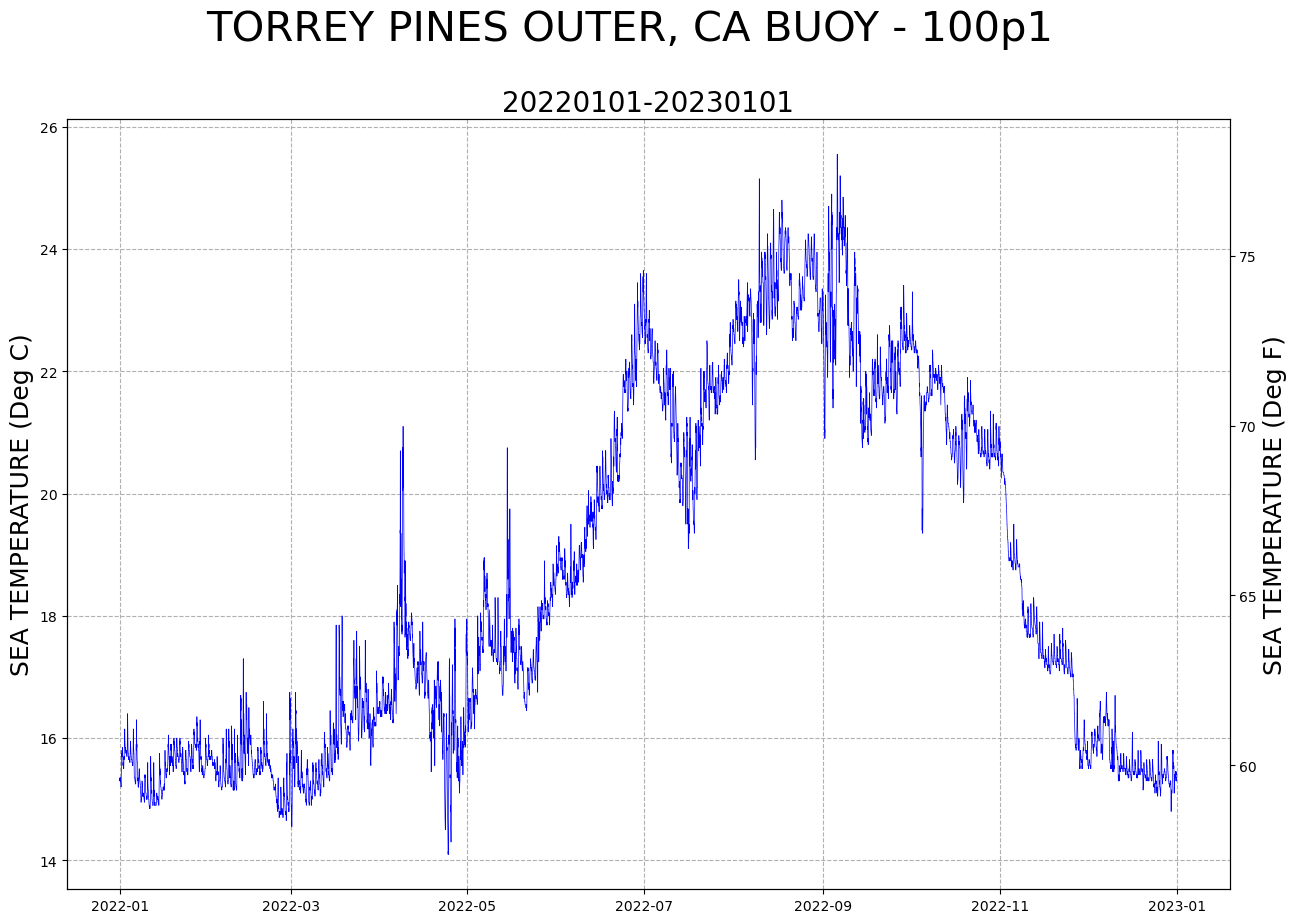

In [71]:
# Create figure and specify figure size
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111) 
ax.plot(df['SST'],'b',linewidth="0.5")

# Set Titles
plt.suptitle(stn_name, fontsize=30, y=0.99)
plt.title(start.strftime("%Y%m%d")+'-'+end.strftime("%Y%m%d"), fontsize=20, y=1)

# Set tick parameters
#pHs.set_xticklabels(['1','6','11','16','21','26','31']) 
#ax.tick_params(axis='y', which='major', labelsize=12, right='off')
#ax.tick_params(axis='x', which='major', labelsize=12, top='off')

def celsius_to_fahrenheit(celsius):
    return (celsius * 9/5) + 32
    
# Make a second y-axis for the Hs plot, to show values in both meters and feet
ax2 = ax.twinx()

# Set y-axis limits for each plot
# Set y-axis limits for each plot
#psst.set_ylim(0,30)
#psst2.set_ylim((0*1.8+32),(30*1.8+32))

celsius_min, celsius_max = ax.get_ylim()
fahrenheit_min = celsius_to_fahrenheit(celsius_min)
fahrenheit_max = celsius_to_fahrenheit(celsius_max)
ax2.set_ylim(fahrenheit_min, fahrenheit_max)
#ax2.set_ylabel("Fahrenheit", color='red')

# Label each y-axis
ax.set_ylabel('SEA TEMPERATURE (Deg C)', fontsize=18)
ax2.set_ylabel('SEA TEMPERATURE (Deg F)', fontsize=18)

# Plot dashed gridlines
ax.grid(linestyle='--')



## Create climatalogy plot


In [106]:
##- Initialize station id, start/end date, and parameters
stn = '100p1'
sdate = '2001'
edate = '2026'
params = ['sstSeaSurfaceTemperature']
##- Use CDIPPY to convert input start/end date strings to datetime objects
start = cdippy.utils.cdip_datetime(sdate)
end = cdippy.utils.cdip_datetime(edate)
##- Grab data using 'get_series' function
data = stn_data.get_series(start, end,params)
##- Convert times to datetime objects
wT = [cdippy.utils.timestamp_to_datetime(x) for x in data['sstTime']]

## Setup Pandas dataframe 

In [107]:
df = pd.DataFrame({'datetime': wT, 'temp': data['sstSeaSurfaceTemperature'].data})

#df = pd.DataFrame({'datetime': date_range, 'temp': temps})
df['date'] = df['datetime'].dt.date
df['year'] = df['datetime'].dt.year
df['doy'] = df['datetime'].dt.dayofyear
df['month_day'] = df['datetime'].dt.strftime('%m-%d')

# Drop Feb 29 for standardization
df = df[~((df['datetime'].dt.month == 2) & (df['datetime'].dt.day == 29))]

# Compute daily mean temperature
daily = df.groupby(['year', 'date']).agg({'temp': 'mean'}).reset_index()
daily['doy'] = pd.to_datetime(daily['date']).dt.dayofyear

# Rolling 7-day mean per year
daily['temp_roll'] = daily.groupby('year')['temp'].transform(lambda x: x.rolling(7, center=True, min_periods=1).mean())

# Pivot into DOY × year
pivot = daily.pivot(index='doy', columns='year', values='temp_roll')

# Climatology: mean, std, min, max (across years per DOY)
clim_mean = pivot.mean(axis=1)
clim_std = pivot.std(axis=1)
clim_min = pivot.min(axis=1)
clim_max = pivot.max(axis=1)

# Latest year
latest_year = pivot.columns[-1]
latest_data = pivot[latest_year]

# Outliers: current year exceeding historic min/max
exceed_mask = (latest_data < clim_min) | (latest_data > clim_max)

# =========================
# Daily extrema (min/max)
# =========================
daily_extrema = df.groupby(['doy'])['temp'].agg(['min', 'max']).reset_index()
#daily_extrema['dayofyear'] = pd.to_datetime(daily_extrema['day']).dt.dayofyear

# =========================
# Weekly climatology (mean ± std)
# =========================
#current_year = df['year'].max()
#clim_df = df[df['year'] < current_year]
#weekly_clim = clim_df.resample('W', on='datetime')['temp'].agg(['mean', 'std'])

# =========================
# Current year weekly mean
# =========================
#current_df = df[df['year'] == current_year]
#weekly_current = current_df.resample('W', on='datetime')['temp'].mean()


## Plot data

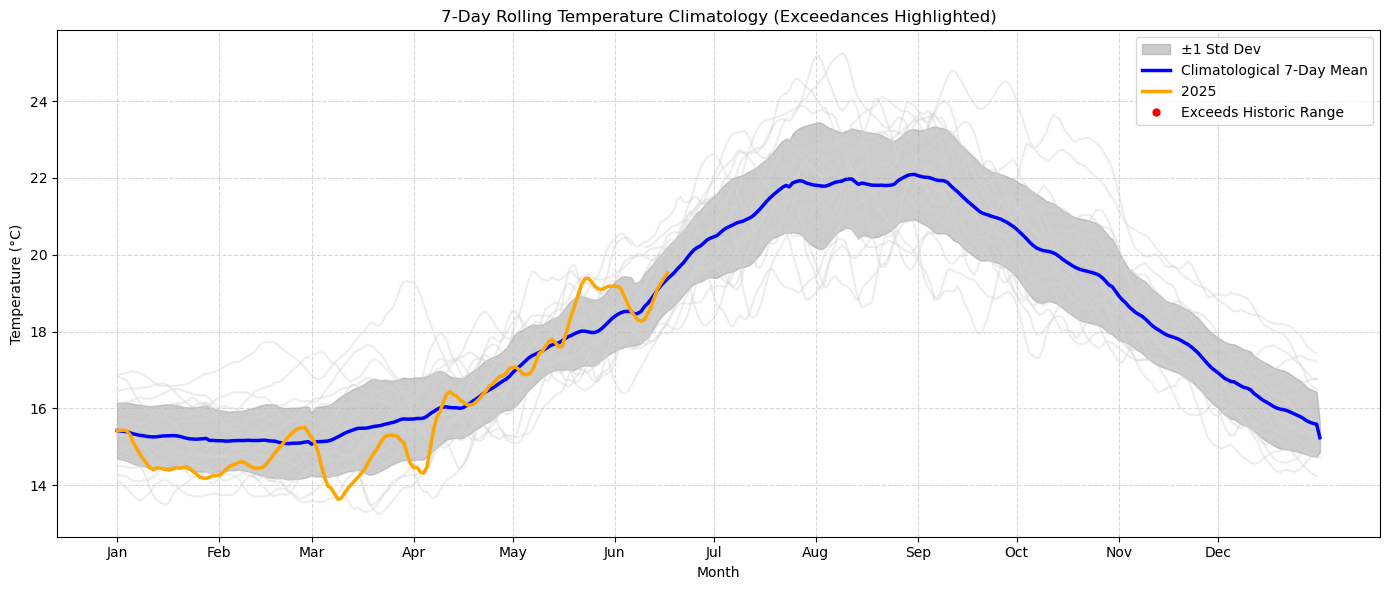

In [108]:
# Plot
fig, ax = plt.subplots(figsize=(14, 6))

# Light gray background for all historical years
for year in pivot.columns:
    ax.plot(pivot.index, pivot[year], color='lightgray', alpha=0.4)

# ±1 std shading
ax.fill_between(pivot.index, clim_mean - clim_std, clim_mean + clim_std,
                color='darkgray', alpha=0.6, label='±1 Std Dev')

# Climatological mean
ax.plot(pivot.index, clim_mean, color='blue', linewidth=2.5, label='Climatological 7-Day Mean')

# Current year
ax.plot(pivot.index, latest_data, color='orange', linewidth=2.5, label=f'{latest_year}')

# Plot exceedances as red dots
ax.plot(pivot.index[exceed_mask], latest_data[exceed_mask],
        'ro', markersize=5, label='Exceeds Historic Range')

# Month ticks
month_starts = pd.date_range("2001-01-01", "2001-12-31", freq='MS')
ax.set_xticks(month_starts.dayofyear)
ax.set_xticklabels(month_starts.strftime('%b'))

# Labels and legend
ax.set_title('7-Day Rolling Temperature Climatology (Exceedances Highlighted)')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature (°C)')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()